Enriched: 50 / 2,870,658
With images: 10
With descriptions: 49
With Wikipedia pages: 13


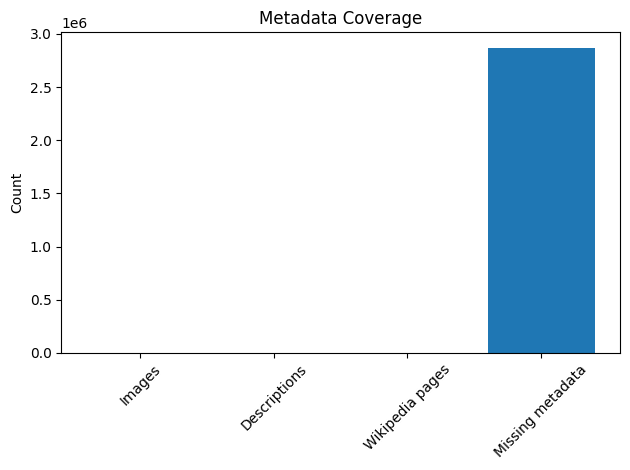

Metadata coverage: 0.0017%


OSError: Cannot save file into a non-existent directory: 'data'

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import os

load_dotenv()

engine = create_engine(os.getenv("POSTGRES_URL"))

nodes_df = pd.read_sql("SELECT * FROM nodes", engine)
meta_df = pd.read_sql("SELECT * FROM metadata", engine)

total_nodes = len(nodes_df)
total_enriched = len(meta_df)
with_images = meta_df['image_url'].notna().sum()
with_desc = meta_df['description'].notna().sum()
with_page = meta_df['wiki_page_url'].notna().sum()

print(f"Enriched: {total_enriched:,} / {total_nodes:,}")
print(f"With images: {with_images:,}")
print(f"With descriptions: {with_desc:,}")
print(f"With Wikipedia pages: {with_page:,}")

image_rows = meta_df[meta_df["image_url"].notna()]
image_rows.sample(min(5, len(image_rows)))

na_desc = meta_df[meta_df["description"].isna()]
na_desc.sample(min(5, len(na_desc)))

df = nodes_df.merge(meta_df, on="ott_id", how="left")

# Show a few enriched rows
df[df["description"].notna()].sample(5)

counts = {
    "Images": with_images,
    "Descriptions": with_desc,
    "Wikipedia pages": with_page,
    "Missing metadata": total_nodes - total_enriched
}

plt.bar(counts.keys(), counts.values())
plt.ylabel("Count")
plt.title("Metadata Coverage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Metadata coverage: {total_enriched / total_nodes:.4%}")
meta_df.sort_values("ott_id", ascending=False).head(10)